## Air Quality Prediction Project – data analysis and preparation

The use case is to predict air quality levels based on various environmental and demographic factors. The goal is to develop a model that can accurately classify air quality, such as Good, Moderate, Poor, or Hazardous

False negatives (predicting better air quality than actual) must be avoided. Underestimating poor air quality could lead to inadequate public health measures and potentially put vulnerable populations at risk. Therefore, we should prioritize minimizing false negatives, especially for the "Hazardous" and "Poor" categories.

Useful Metrics for Model Comparison:
Recall (Sensitivity): This metric is crucial, especially for the "Poor" and "Hazardous" classes, as it measures the model's ability to identify all instances of these critical categories correctly.

F1 Score: The F1 score will be valuable in assessing overall model performance while considering both false positives and false negatives.

Confusion Matrix: This will provide a detailed breakdown of model predictions, allowing us to visualize misclassifications between different air quality categories.

Weighted Average Metrics: Since we're dealing with a multi-class problem with class imbalance, using weighted averages of precision, recall, and F1 score will give a more representative overall performance measure.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Load the data
df = pd.read_csv('updated_pollution_dataset.csv')

df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [3]:
# Check for null values
print("Null values before cleaning:")
print(df.isnull().sum())

Null values before cleaning:
Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [13]:
# Display the first few rows of the cleaned dataset
print("\nFirst few rows of cleaned dataset:")
print(df.head())


First few rows of cleaned dataset:
   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  


In [6]:
print("Basic Statistics:")
df.describe()

Basic Statistics:


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [7]:
# Pearson Correlation Coefficient
print("\nPearson Correlation Coefficient Matrix:")
print(df.corr(numeric_only=True))


Pearson Correlation Coefficient Matrix:
                               Temperature  Humidity     PM2.5      PM10  \
Temperature                       1.000000  0.466456  0.323840  0.425690   
Humidity                          0.466456  1.000000  0.273366  0.359156   
PM2.5                             0.323840  0.273366  1.000000  0.973005   
PM10                              0.425690  0.359156  0.973005  1.000000   
NO2                               0.591969  0.491977  0.333004  0.439916   
SO2                               0.568082  0.459804  0.299582  0.401849   
CO                                0.685258  0.567540  0.395179  0.518895   
Proximity_to_Industrial_Areas    -0.589564 -0.479646 -0.315766 -0.425018   
Population_Density                0.481692  0.411630  0.278957  0.365734   

                                    NO2       SO2        CO  \
Temperature                    0.591969  0.568082  0.685258   
Humidity                       0.491977  0.459804  0.567540   
PM2.5    

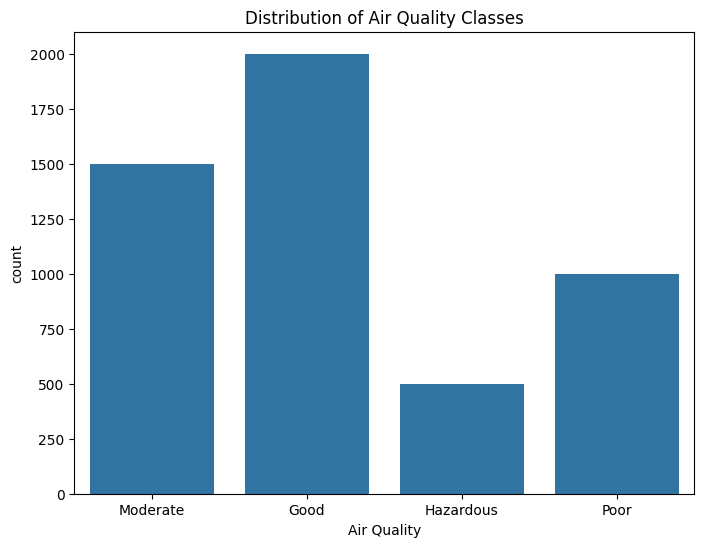

In [8]:
# Bar plot of Air Quality class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Air Quality')
plt.title('Distribution of Air Quality Classes')
plt.show()

In [11]:
# Define categorical and numerical features
categorical_features = ['Air Quality']  # Specify categorical columns
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

# Verify if 'Air Quality' is in numerical_features before attempting to remove
if 'Air Quality' in numerical_features:
    numerical_features.remove('Air Quality')

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep other columns
)

# Apply the transformations
df_transformed = preprocessor.fit_transform(df)

# Get new column names after one-hot encoding
new_categorical_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
new_columns = list(new_categorical_columns) + numerical_features

# Create a new dataframe with transformed data
df_transformed = pd.DataFrame(df_transformed, columns=new_columns)

# Extract labels and features
X = df_transformed.drop(columns=list(new_categorical_columns))  # Drop original categorical columns after one-hot encoding
y = df['Air Quality']

# Split the data into training, validation, and testing sets (60/20/20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3000, 9)
y_train shape: (3000,)
X_val shape: (1000, 9)
y_val shape: (1000,)
X_test shape: (1000, 9)
y_test shape: (1000,)


In [12]:
# Combine features and labels back into DataFrames for saving
train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Save the datasets to CSV files
train_df.to_csv('train_data.csv', index=False)
val_df.to_csv('val_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

print("Training data saved to train_data.csv")
print("Validation data saved to val_data.csv")
print("Testing data saved to test_data.csv")

Training data saved to train_data.csv
Validation data saved to val_data.csv
Testing data saved to test_data.csv
